In [1]:
import pandas as pd
import censusdata
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
from scipy import stats
from shapely.geometry import Point

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
from config import *

In [3]:
df_path = dataFolder + "Hospitals (1).csv"

df = pd.read_csv(df_path)
df.head()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-86.494549,31.295795,1,1336420,ANDALUSIA HEALTH,"849 SOUTH THREE NOTCH STREET, PO BOX 760",ANDALUSIA,AL,36420,NOT AVAILABLE,...,2014/02/10 00:00:00+00,http://www.andalusiaregionalhospital.com,H2001,NOT AVAILABLE,1,PROPRIETARY,-999,88,LEVEL III,Y
1,-86.978407,34.804164,2,1535611,ATHENS LIMESTONE HOSPITAL,700 WEST MARKET STREET,ATHENS,AL,35611,NOT AVAILABLE,...,2013/10/02 00:00:00+00,http://www.athenslimestonehospital.com,H4201,NOT AVAILABLE,1,PROPRIETARY,-999,71,LEVEL III,N
2,-87.478799,31.017024,3,136502,ATMORE COMMUNITY HOSPITAL,401 MEDICAL PARK DR,ATMORE,AL,36502,NOT AVAILABLE,...,2014/02/10 00:00:00+00,http://www.ebaptisthealthcare.org/atmorecommun...,H2704,NOT AVAILABLE,1,NON-PROFIT,-999,51,LEVEL III,Y
3,-86.174930,32.376399,4,236124,BAPTIST MEDICAL CENTER EAST,"400 TAYLOR ROAD, PO BOX 241267",MONTGOMERY,AL,36117,1267,...,2013/09/03 00:00:00+00,http://www.baptistfirst.org,H5107,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,150,NOT AVAILABLE,Y
4,-86.277549,32.328154,5,1736111,BAPTIST MEDICAL CENTER SOUTH,"2105 EAST SOUTH BOULEVARD, PO BOX 11010",MONTGOMERY,AL,36111,0010,...,2014/03/12 00:00:00+00,http://www.baptistfirst.org,H5102,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,432,LEVEL II,Y


In [4]:


# Assuming df contains columns 'x' and 'y' with x and y coordinates respectively
# Create a Point geometry for each row using Shapely
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]

# Create a GeoDataFrame with the geometry column and any other relevant columns from df
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# The new gdf will have the geometry column with Point objects representing x and y coordinates
gdf

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
0,-86.494549,31.295795,1,1336420,ANDALUSIA HEALTH,"849 SOUTH THREE NOTCH STREET, PO BOX 760",ANDALUSIA,AL,36420,NOT AVAILABLE,...,http://www.andalusiaregionalhospital.com,H2001,NOT AVAILABLE,1,PROPRIETARY,-999,88,LEVEL III,Y,POINT (-86.49455 31.29580)
1,-86.978407,34.804164,2,1535611,ATHENS LIMESTONE HOSPITAL,700 WEST MARKET STREET,ATHENS,AL,35611,NOT AVAILABLE,...,http://www.athenslimestonehospital.com,H4201,NOT AVAILABLE,1,PROPRIETARY,-999,71,LEVEL III,N,POINT (-86.97841 34.80416)
2,-87.478799,31.017024,3,136502,ATMORE COMMUNITY HOSPITAL,401 MEDICAL PARK DR,ATMORE,AL,36502,NOT AVAILABLE,...,http://www.ebaptisthealthcare.org/atmorecommun...,H2704,NOT AVAILABLE,1,NON-PROFIT,-999,51,LEVEL III,Y,POINT (-87.47880 31.01702)
3,-86.174930,32.376399,4,236124,BAPTIST MEDICAL CENTER EAST,"400 TAYLOR ROAD, PO BOX 241267",MONTGOMERY,AL,36117,1267,...,http://www.baptistfirst.org,H5107,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,150,NOT AVAILABLE,Y,POINT (-86.17493 32.37640)
4,-86.277549,32.328154,5,1736111,BAPTIST MEDICAL CENTER SOUTH,"2105 EAST SOUTH BOULEVARD, PO BOX 11010",MONTGOMERY,AL,36111,0010,...,http://www.baptistfirst.org,H5102,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,432,LEVEL II,Y,POINT (-86.27755 32.32815)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,-74.347278,40.500067,8117,196784290,UNIVERSITY HOSPITAL,97 SUNFIELD AVENUE,EDISON,NJ,8837,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,34,NOT AVAILABLE,-999,-999,NOT AVAILABLE,NOT AVAILABLE,POINT (-74.34728 40.50007)
8009,-104.754827,38.968781,8118,196784298,CHILDREN'S HOSPITAL OF COLORADO - COLORADO SPR...,4090 BRIARGATE PARKWAY,COLORADO SPRINGS,CO,80920,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,8,NOT AVAILABLE,-999,-999,NOT AVAILABLE,Y,POINT (-104.75483 38.96878)
8010,-91.219417,30.266626,8119,196784302,OCHSNER MEDICAL COMPLEX IBERVILLE,25455 LA-1,PLAQUEMINE,LA,70764,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,22,NOT AVAILABLE,-999,-999,NOT AVAILABLE,Y,POINT (-91.21942 30.26663)
8011,-83.811348,39.939755,8120,196784919,MERCY HEALTH FOUNTIAN MEDICAL CAMPUS,100 W MCCREIGHT AVE,SPRINGFIELD,OH,45504,NOT AVAILABLE,...,https://www.mercy.com/,NOT AVAILABLE,NOT AVAILABLE,39,PROPRIETARY,-999,-999,NOT AVAILABLE,N,POINT (-83.81135 39.93975)


In [5]:
# Drop the 'x' and 'y' columns from the GeoDataFrame
gdf.drop(['X', 'Y'], axis=1, inplace=True)

In [6]:
gdf = gdf.set_crs('EPSG:4326').to_crs(3857)

In [7]:
gdf

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
0,1,1336420,ANDALUSIA HEALTH,"849 SOUTH THREE NOTCH STREET, PO BOX 760",ANDALUSIA,AL,36420,NOT AVAILABLE,(334) 222-8466,GENERAL ACUTE CARE,...,http://www.andalusiaregionalhospital.com,H2001,NOT AVAILABLE,1,PROPRIETARY,-999,88,LEVEL III,Y,POINT (-9628529.163 3671223.674)
1,2,1535611,ATHENS LIMESTONE HOSPITAL,700 WEST MARKET STREET,ATHENS,AL,35611,NOT AVAILABLE,(256) 262-6468,GENERAL ACUTE CARE,...,http://www.athenslimestonehospital.com,H4201,NOT AVAILABLE,1,PROPRIETARY,-999,71,LEVEL III,N,POINT (-9682392.001 4137299.549)
2,3,136502,ATMORE COMMUNITY HOSPITAL,401 MEDICAL PARK DR,ATMORE,AL,36502,NOT AVAILABLE,(251) 368-2500,GENERAL ACUTE CARE,...,http://www.ebaptisthealthcare.org/atmorecommun...,H2704,NOT AVAILABLE,1,NON-PROFIT,-999,51,LEVEL III,Y,POINT (-9738095.305 3634960.214)
3,4,236124,BAPTIST MEDICAL CENTER EAST,"400 TAYLOR ROAD, PO BOX 241267",MONTGOMERY,AL,36117,1267,(334) 747-4410,GENERAL ACUTE CARE,...,http://www.baptistfirst.org,H5107,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,150,NOT AVAILABLE,Y,POINT (-9592949.329 3812820.957)
4,5,1736111,BAPTIST MEDICAL CENTER SOUTH,"2105 EAST SOUTH BOULEVARD, PO BOX 11010",MONTGOMERY,AL,36111,0010,(334) 286-2100,GENERAL ACUTE CARE,...,http://www.baptistfirst.org,H5102,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,432,LEVEL II,Y,POINT (-9604372.861 3806463.434)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,8117,196784290,UNIVERSITY HOSPITAL,97 SUNFIELD AVENUE,EDISON,NJ,8837,NOT AVAILABLE,(973) 972-0871,GENERAL ACUTE CARE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,34,NOT AVAILABLE,-999,-999,NOT AVAILABLE,NOT AVAILABLE,POINT (-8276301.107 4938878.940)
8009,8118,196784298,CHILDREN'S HOSPITAL OF COLORADO - COLORADO SPR...,4090 BRIARGATE PARKWAY,COLORADO SPRINGS,CO,80920,NOT AVAILABLE,NOT AVAILABLE,CHILDREN,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,8,NOT AVAILABLE,-999,-999,NOT AVAILABLE,Y,POINT (-11661253.978 4717200.633)
8010,8119,196784302,OCHSNER MEDICAL COMPLEX IBERVILLE,25455 LA-1,PLAQUEMINE,LA,70764,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,22,NOT AVAILABLE,-999,-999,NOT AVAILABLE,Y,POINT (-10154499.095 3537868.338)
8011,8120,196784919,MERCY HEALTH FOUNTIAN MEDICAL CAMPUS,100 W MCCREIGHT AVE,SPRINGFIELD,OH,45504,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,https://www.mercy.com/,NOT AVAILABLE,NOT AVAILABLE,39,PROPRIETARY,-999,-999,NOT AVAILABLE,N,POINT (-9329836.577 4857191.490)


# Plotting Hospitals

In [8]:
statesShp = gpd.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

In [9]:
def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

def plotTX():
    ax = statesShp[statesShp['STUSPS'] == 'TX'].plot(figsize=(10, 10), color='#e4e4e4', edgecolor='black', linewidth=2)
    ax.axis('equal')
    plt.xlim(-1.23e7, -1e7)
    plt.ylim(2.5e6, 5e6)
    return ax

def plotDFW():
    ax = statesShp[statesShp['STUSPS'] == 'TX'].plot(figsize=(10, 10), color='#e4e4e4', edgecolor='black', linewidth=2)
    ax.axis('equal')
    plt.xlim(-1.12e7, -1.04e7)
    plt.ylim(3.7e6, 4.1e6)
    return ax

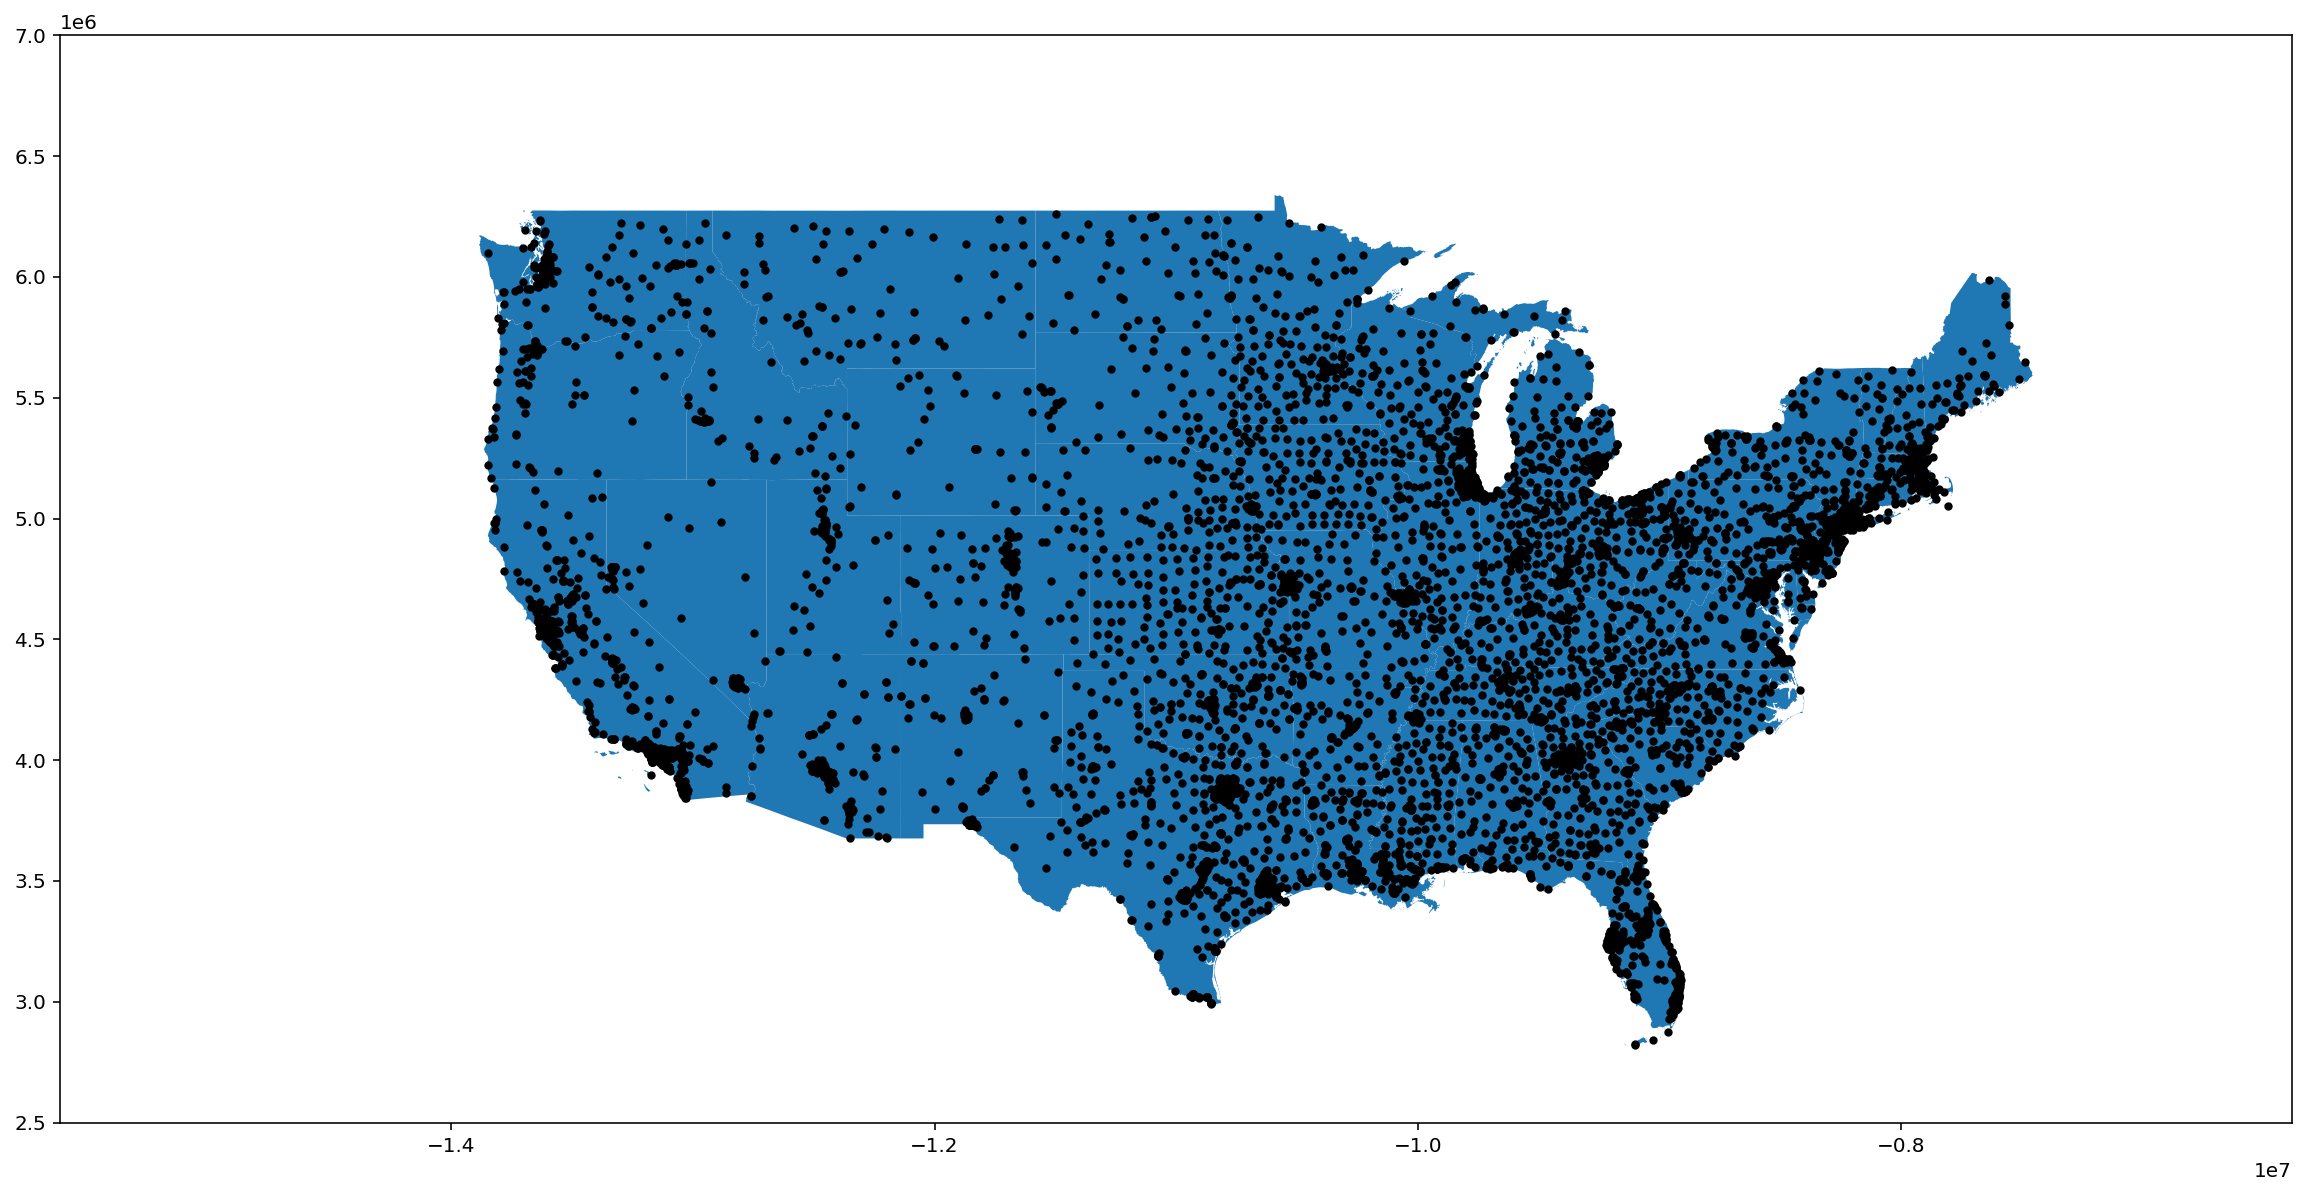

In [10]:
ax = plotUS()

# Plot the points on top of the existing map
gdf.plot(ax=ax, color='black', markersize=10)

# Show the map
plt.show()